<div align='center'> 
# Atomic Time and Frequency Standards Lab Notebook

<div align='center'> 
## By Adithya Shastry 
## PH250
### 2020/04/02

In this lab note book I will be looking into the data collected in in the Atomic Time and Frequency Standards experiment. This experiment conducted two different tests to in order to see the accuracy of a crystal based clock and two Rubidium Atomic clocks DG535, PRS10, and FS725 respectively. The oscillations of these clocks were measured graphed on a Tektronix DP02014B Four-Channel Digital Phosphor Oscilloscope and a Keysight 53220A 355 MHz-100ps Universal Frequency Counter.

## Basic Analysis
First some preliminary analysis will be done on the data. When the clocks were connected to the oscilloscope it showed the following waveform:
 ![T0001.PNG](T0001.PNG)

Here Channel 1, 2, and 3 represent FS725,PRS10, and DG535 respectively. The oscilloscope was triggering on Channel 1 which not only kept the wave from Channel 1 stable, but also the one from Channel 2. This shows that the frequencies at which these two atomic clocks were oscillating were indeed very close to one another. The Waveform from Channel 3, on the other hand, was not stable(This shows us that the DG535 clock has a very different frequency of oscillation as compared to FS725 and PRS10) as expected since it is a crystal controlled clock.

## Phase Difference Between Two Atomic Clock Outputs
Here we will look into the phase difference and eventually, after some calculation, into the frequency difference between the PRS10 and FS725. 

In [2]:
import numpy as np # Numpy is a linear algebra library that is the backbone for other libraries 
#I will import below
import pandas as pd # This library will allow me to manage the datasets in the expirement
import matplotlib.pyplot as plt # this is a plotting library
#this will allow me to plot in the jupyter notebook
%matplotlib inline 
import seaborn as sns # will be used to make histograms

Now with that out of the way I will import the file named "Datalog01.csv" since it contains the data that I want to plot

In [3]:
phaseDiff=pd.read_csv("DataLog01.csv",header=None)
#Now I will take a look at the first few elements to see what we to work with
phaseDiff.columns=['Phase Difference (deg)']# Simply adds the column name "Phase Difference" to our data
#Now lets add a time column to this data, we know we went by 0.25 second intervale
t=[]
x=0
for i in phaseDiff["Phase Difference (deg)"]:
    t.append(x)
    x=x+0.25

phaseDiff['Time(s)']=t
phaseDiff.reset_index()
phaseDiff.set_index('Time(s)',inplace=True)
phaseDiff.head()

,Phase Difference (deg)
Time(s),
0.00,17.762293
0.25,17.605078
0.50,17.437939
0.75,17.263048
1.00,17.171824


Now that we have the data in the way that we want it, we can begin to plot the data and do a regression on the data. In other words do the following
1. Make an initial plot
2. Do the necessary regression
3. Plot again and calculate the $\Delta f$ for the two clocks

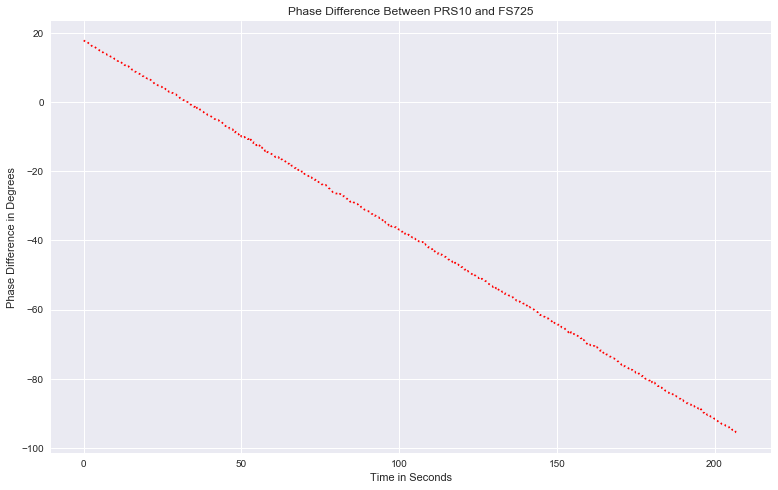

In [4]:
#We will make an initial plot
fig=plt.figure(figsize=(10,6))
fig.add_axes([0,0,1,1])



#Plot the data
plt.plot(phaseDiff.reset_index()['Time(s)'],
         phaseDiff['Phase Difference (deg)'],linestyle='dotted',markersize=10,color='red')


#Set Titles and axes labels
plt.xlabel("Time in Seconds")
plt.ylabel("Phase Difference in Degrees")
plt.title("Phase Difference Between PRS10 and FS725")

In [5]:
#Now we will do a quick Linear regression

X=phaseDiff.reset_index()['Time(s)'].values
y=phaseDiff['Phase Difference (deg)'].values

#Import Scipy for linear regression
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(X,y)


#Print the values
print('The Slope of the line is: '+str(round(slope,3)))
print('The Y-Intercept is: '+str(round(intercept,3)))
print("The r-squared value for this is: "+str(r_value))

The Slope of the line is: -0.547
The Y-Intercept is: 17.75
The r-squared value for this is: -0.999983081863


Now let us re-plot with the linear regression

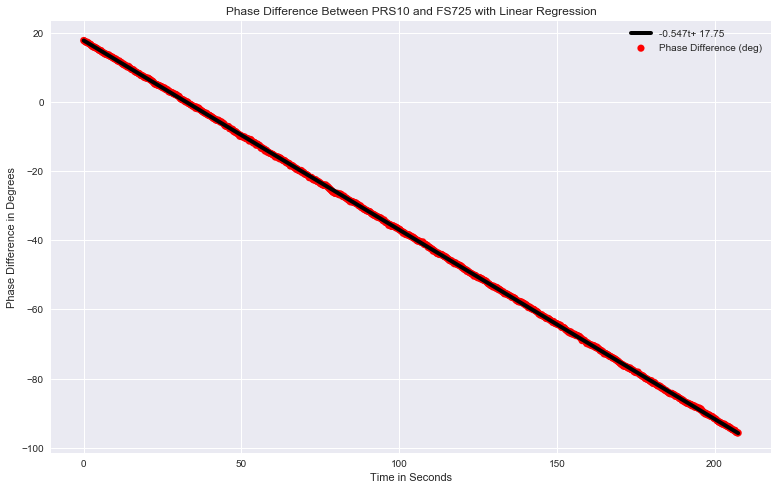

In [6]:
#We will make an initial plot
fig=plt.figure(figsize=(10,6))
fig.add_axes([0,0,1,1])
#Plot the data
plt.scatter(phaseDiff.reset_index()['Time(s)'],phaseDiff['Phase Difference (deg)'],
            linestyle='dotted',color='red')
#Plot the line
time=phaseDiff.reset_index()['Time(s)']
plt.plot(time,time*slope+intercept,label=str(round(slope,3))+"t+ "
         +str(round(intercept,3)),linewidth=4,color='black')
#Set Titles and axes labels
plt.xlabel("Time in Seconds")
plt.ylabel("Phase Difference in Degrees")
plt.title("Phase Difference Between PRS10 and FS725 with Linear Regression")
plt.legend(loc=1)

As can be seen in the values above, we have a linear regression model that fits the data pretty well. The equation takes the form:
\begin{equation}\label{eq:1}
\Delta \phi=17.8-0.547t
\end{equation}
Now what we just plotted is is the phase difference between the two clocks which have oscillations that take the general form of $V_1=V_{10}\cos(2\pi f_1 t+ \phi_1)$ and $V_2=V_{20}\cos(2\pi f_2 t+ \phi_2)$. These two equation can then be combined to give us equation \ref{eq:2}

\begin{equation}\label{eq:2}
\Delta \phi=2\pi \Delta f t+ \Delta \phi_0
\end{equation}

Notice that this equation is what we have plotted in the graph above and for what we have just derived the equation for. This tells us that the the $\Delta \phi_0=17.8^{\circ}$ and that $\Delta f \approx -0.002$ radians. This $\Delta f$ value is in line with what we measured when conducting the experiment-there was not much of a difference at all between the two atomic clocks.





## 10MHz output frequencies using the counter/timer

In this portion of the lab we connected the crystal clock and the PRS10 to the Keysight 53220A counter timer in order to see the frequencies of both the clocks. First, we used the internal clock of the Keysight to make these measurements(We took one measurement visually from the the output of the Keysight). For the PRS10 we got a measurement of $9.999996883 \pm 0.00000003\%$ MHz and $10.00001 \pm 0.00001 \% $ MHz. The expected accuracy of the PRS10 is given in the image below which was taken from the data sheet for the PRS10 atomic clock

![expected accuracy](ExpectedAccuracy.png)

This lines up with the expected value however, the Keysight will only display 12 digits, however when we took this measurement the 12th digit was not constant at all and thus we used it to measure the uncertainty. This is a limitation I suspect stemming from the way time is kept in the counter timer itself. We fixed this issue in the next part of the experiment. The image below was taken from the Keysight 53220A data sheet and shows the limitation I just expressed above.

![Keysight](Keysight.png)

The issue mentioned earlier was fixed by connecting the FS725 into the Keysight Counter timer and was used as the external reference clock for its calculations. I will plot a histogram of this data and find the mean and standard deviation of the frequency measurements we made for the DG535 and PRS10 respectively. 

In [7]:
PRS10=pd.read_csv('DataLog06.csv',header=None)
PRS10.columns=['PRS10 Frequency']
#set up the t again
t=[]
x=0 # this time we want to increment by 0.1
for i in PRS10["PRS10 Frequency"]:
    t.append(x)
    x=x+0.1
PRS10['Time(s)']=t
#Now let's plot the frequency difference with 10**6
PRS10['PRS10 Frequency Deviation']=(PRS10['PRS10 Frequency']-(1*10**7))
PRS10.head(5)

,PRS10 Frequency,Time(s),PRS10 Frequency Deviation
0,1.000000e+07,0.0,-0.001494
1,1.000000e+07,0.1,-0.001376
2,1.000000e+07,0.2,-0.001297
3,1.000000e+07,0.3,-0.001290
4,1.000000e+07,0.4,-0.001058


The average frequency for the PRS10 was 9999999.998
The Standard Deviation of the frequency for the PRS10 was 0.000426
4.261511366929818e-09


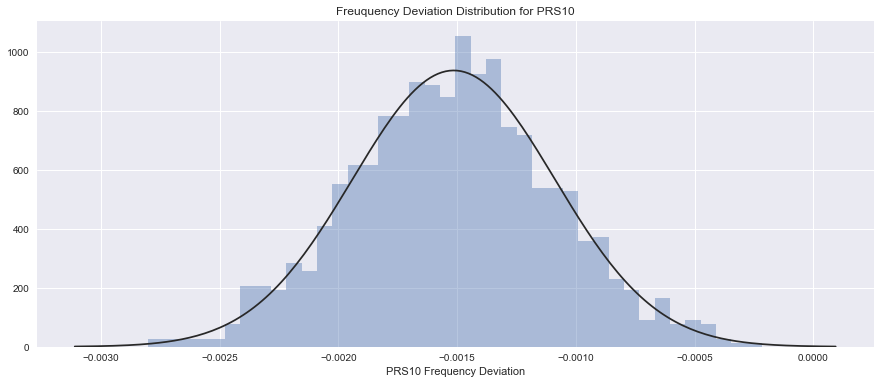

In [8]:
#Now let's make a histogream of this data
plt.figure(figsize=(15,6))
plt.title("Freuquency Deviation Distribution for PRS10")
#import Gaussian Distribution 
from scipy.stats import norm
sns.distplot(kde=False,a=PRS10['PRS10 Frequency Deviation'],fit=norm,bins=40)
#The fit method here will automatically calculate the Normal distribution for the data
#let's calculate the mean and stdev
PRS10_mean=PRS10['PRS10 Frequency'].mean()
PRS10_stdev=PRS10['PRS10 Frequency'].std()
print("The average frequency for the PRS10 was "+str(round(PRS10_mean,3)))
print("The Standard Deviation of the frequency for the PRS10 was "+str(round(PRS10_stdev,6)))
print((PRS10_stdev/PRS10_mean)*100)

As can be seen in the data above, the average frequency is $f_{\text{PRS10}}= 9999999.998 \pm 0.000426$ MHz. the fractional uncertainty was $4.261511366929818 \times 10^{-9}\%$. 


Now let's do the same for the DG535 crystal controlled clock

In [9]:
DG535=pd.read_csv("DataLog05.csv",header=None)
DG535.columns=["DG535 Frequency"]
#set up the t again
t=[]
x=0 # this time we want to increment by 0.1
for i in DG535["DG535 Frequency"]:
    t.append(x)
    x=x+0.1
DG535['Time(s)']=t
#Now let's plot the frequency difference with 10**6
DG535['DG535 Frequency Deviation']=(DG535['DG535 Frequency']-(1*10**7))
DG535.head(10)

,DG535 Frequency,Time(s),DG535 Frequency Deviation
0,1.000000e+07,0.0,1.196234
1,1.000000e+07,0.1,1.195427
2,1.000000e+07,0.2,1.197211
3,1.000000e+07,0.3,1.191389
4,1.000000e+07,0.4,1.186037
5,1.000000e+07,0.5,1.187319
6,1.000000e+07,0.6,1.184631
7,1.000000e+07,0.7,1.186955
8,1.000000e+07,0.8,1.186024
9,1.000000e+07,0.9,1.182360


The average frequency for the PRS10 was 10000000.993
The Standard Deviation of the frequency for the PRS10 was 0.153704
1.5370377025603327e-06


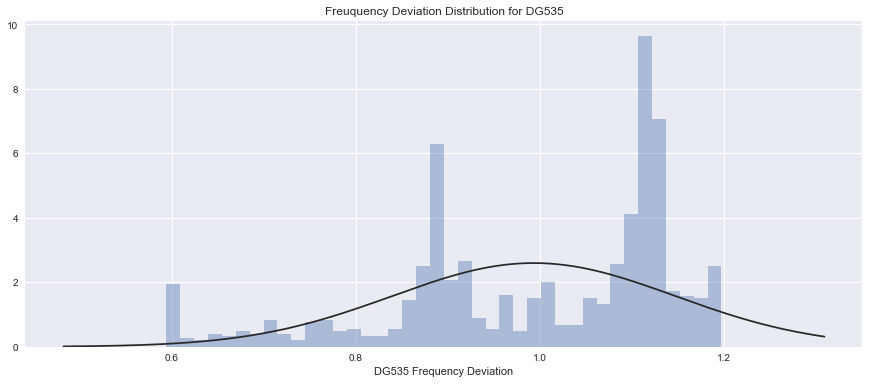

In [10]:
#Now let's make a histogream of this data!
plt.figure(figsize=(15,6))
plt.title("Freuquency Deviation Distribution for DG535")
sns.distplot(kde=False,a=DG535['DG535 Frequency Deviation'],fit=norm,bins=40)
#let's calculate the mean and stdev
DG535_mean=DG535['DG535 Frequency'].mean()
DG535_stdev=DG535['DG535 Frequency'].std()
print("The average frequency for the PRS10 was "+str(round(DG535_mean,3)))
print("The Standard Deviation of the frequency for the PRS10 was "+str(round(DG535_stdev,6)))
print((DG535_stdev/DG535_mean)*100)

As can be seen in the data above, the average frequency is $f_{\text{PRS10}}= 10000000.993 \pm 0.153704$ MHz. the fractional uncertainty was $1.5370377025603327 \times 10^{-6}\%$. The fractional uncertainty aligns perfectly with the specifications listed by the manufacturer(As seen in the snippet from the manufacturer)


As expected the DG535 is less accurate than the PRS10 since it is a crystal based clock. This can be seen in the average frequency, the percent error of the DG535 when compared to that of the PRS10, and the distribution plots for both of the clocks. It is clearly seen that the PRS10 follows a Gaussian distribution as illustrated by the plot above, whereas the DG535 does not as it deviates from the expected value in numerous places. To further illustrate this point we can consider how the frequency of the two clocks changes with respect to time. This will be down below:

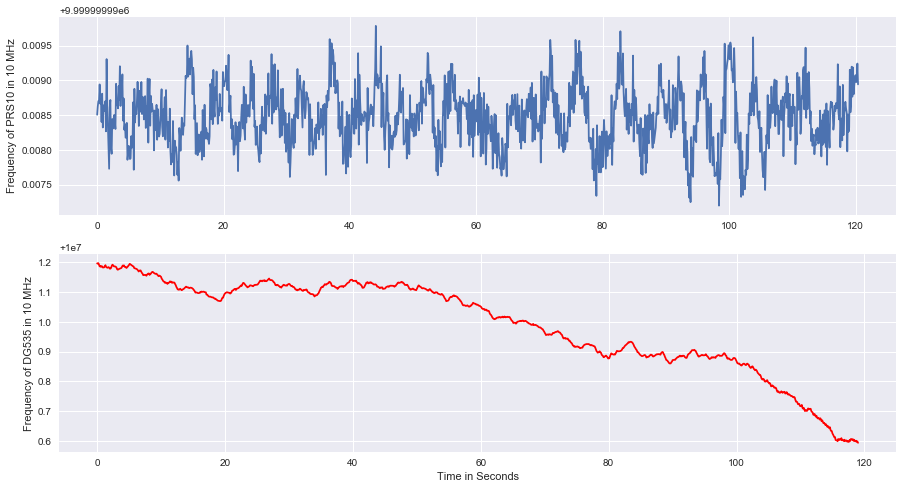

In [11]:
fig,a=plt.subplots(2,1)
a[0].plot(PRS10['Time(s)'],PRS10["PRS10 Frequency"],label='PRS10 Frequency')
a[0].set_ylabel("Frequency of PRS10 in 10 MHz")
a[1].plot(DG535['Time(s)'],DG535["DG535 Frequency"],label='DG535 Frequency',color='red')
a[1].set_ylabel("Frequency of DG535 in 10 MHz")
a[1].set_xlabel("Time in Seconds")
fig.set_figheight(8)
fig.set_figwidth(15)

As can be seen in the graph above, the structure of the two plots are completely different. The plot of the DG535 does not oscillate whereas the plot of the PRS10 does. It is also important to notice the axis with which the frequency of the DG535 is plotted-the axis covers a greater value of numbers than the axis for PR510. 

## Conclusion

In conclusion, it is clear that the DG535 has intrinsic to it a substantial amount of error when compared to the precise and accurate nature of the PRS10 and FS725. However, these inaccuracies only show up when the DG535 is being asked to keep time in a precise nature as what was required during this experiment. For most general use cases, where this sort of precision is not needed, the DG535 proves to be a fairly usable clock and should be readily usable. In that sense, it is clear why the atomic clocks are frequently used in GPS and other use cases that require precision at the scale that the PRS10 and FS725 can offer. In these cases, given the precise nature of the instrumentation being used, a crystal clock like the DG535 would prove to be a bottleneck in the overall uncertainty of the measurements made.